In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imageio.v3 as iio
import plotly.express as px

In [2]:
summary_df = pd.read_csv('CSV/wheat/master_summary.csv')

In [53]:
summary_df.columns

Index(['Unnamed: 0', 'Name', 'Run_ID', 'Avg RHL (mm)', 'Max RHL (mm)',
       'Min RHL (mm)', 'Total RHD (mm^{2})', 'Max RHL Segment Delta (mm)',
       'Max RHL Segment Pos (mm)', 'Max RHD Segment Delta (mm)',
       'Max RHD Segment Pos (mm)', 'Elongation Zone Distance (mm)',
       'Elongation Zone Start (mm)', 'Elongation Zone Stop (mm)',
       'Elongation Zone Gradient', 'Root Thickness (mm)', 'Root Length (mm)'],
      dtype='object')

In [3]:
summary_df.drop(['Unnamed: 0'], axis=1)

,Name,Run_ID,Avg RHL (mm),Max RHL (mm),Min RHL (mm),Total RHD (mm^{2}),Max RHL Segment Delta (mm),Max RHL Segment Pos (mm),Max RHD Segment Delta (mm),Max RHD Segment Pos (mm),Elongation Zone Distance (mm),Elongation Zone Start (mm),Elongation Zone Stop (mm),Elongation Zone Gradient,Root Thickness (mm),Root Length (mm)
0,dakter_0002_1,dakter,1.506961,2.313725,0.000000,52.594771,1.049020,19.607843,0.281911,19.607843,8.823529,0.588235,9.411765,0.213229,0.718487,19.607843
1,dakter_0003_2,dakter,1.395110,2.215686,0.000000,40.465782,0.617647,15.882353,0.099193,15.882353,7.254902,1.372549,8.627451,0.241069,0.686275,16.274510
2,dakter_0003_1,dakter,0.697647,0.774510,0.529412,6.613514,1.333333,0.392157,0.251346,0.392157,1.176471,0.784314,1.960784,0.125000,0.711850,4.901961
3,dakter_0004,dakter,1.236641,1.764706,0.000000,39.894368,1.627451,17.647059,0.258362,17.843137,5.882353,1.568627,7.450980,0.262359,0.839009,17.843137
4,dakter_0005_1,dakter,0.886607,1.705882,0.000000,16.221165,0.529412,8.039216,0.127643,9.607843,7.254902,1.372549,8.627451,0.228090,0.645276,10.392157
5,dakter_0001,dakter,1.299253,2.078431,0.000000,36.986928,1.784314,15.686275,0.261534,15.686275,6.274510,0.196078,6.470588,0.229316,0.649942,16.470588
6,dakter_0002_2,dakter,1.214753,1.990196,0.000000,27.119858,0.803922,12.352941,0.221357,12.352941,7.450980,1.372549,8.823529,0.238515,0.686275,12.352941
7,dakter_0005_2,dakter,1.168057,1.921569,0.000000,27.484237,0.725490,12.352941,0.139754,13.137255,7.254902,1.372549,8.627451,0.241355,0.602241,13.137255
8,hereward_0006,hereward,1.675035,2.539216,0.102941,59.012111,1.627451,19.019608,0.283833,18.823529,7.450980,1.372549,8.823529,0.278868,0.861811,19.411765
9,hereward_0002,hereward,1.876257,2.656863,0.274510,76.771915,1.519608,1.960784,0.310073,22.549020,6.078431,0.196078,6.274510,0.322161,1.131536,22.549020


In [4]:
summary_df_melted = pd.melt(summary_df,
                            value_vars=['Avg RHL (mm)', 'Max RHL (mm)',
                            'Min RHL (mm)', 'Total RHD (mm^{2})', 'Max RHL Segment Delta (mm)',
                            'Max RHL Segment Pos (mm)', 'Max RHD Segment Delta (mm)',
                            'Max RHD Segment Pos (mm)', 'Elongation Zone Distance (mm)',
                            'Elongation Zone Start (mm)', 'Elongation Zone Stop (mm)',
                            'Elongation Zone Gradient', 'Root Thickness (mm)', 'Root Length (mm)'],
                            id_vars=['Name', 'Run_ID'])

In [5]:
summary_df_melted

,Name,Run_ID,variable,value
0,dakter_0002_1,dakter,Avg RHL (mm),1.506961
1,dakter_0003_2,dakter,Avg RHL (mm),1.395110
2,dakter_0003_1,dakter,Avg RHL (mm),0.697647
3,dakter_0004,dakter,Avg RHL (mm),1.236641
4,dakter_0005_1,dakter,Avg RHL (mm),0.886607
...,...,...,...,...
765,soissons_0010,soissons,Root Length (mm),13.725490
766,soissons_0009,soissons,Root Length (mm),10.392157
767,soissons_0007,soissons,Root Length (mm),20.392157
768,soissons_0014,soissons,Root Length (mm),15.686275


In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15,15)

In [7]:
titles = [r'Average RHL (mm)',
          r'Max RHL (mm)',
          r'Min RHL (mm)',
          r'Total RHD (mm$^{2}$)',
          r'Max RHL $\delta$ (mm)',
          r'Max RHL $\delta$ pos (mm)',
          r'Max RHD $\delta$ (mm$^{2}$)',
          r'Max RHD $\delta$ pos (m)',
          r'Elongation Zone Size (mm)',
          r'Elongation Zone Start Pos (mm)',
          r'Elongation Zone End Pos (mm)',
          r'Elongation Zone Gradient',
          r'Root Thickness (mm)',
          r'Root Length (mm)']

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

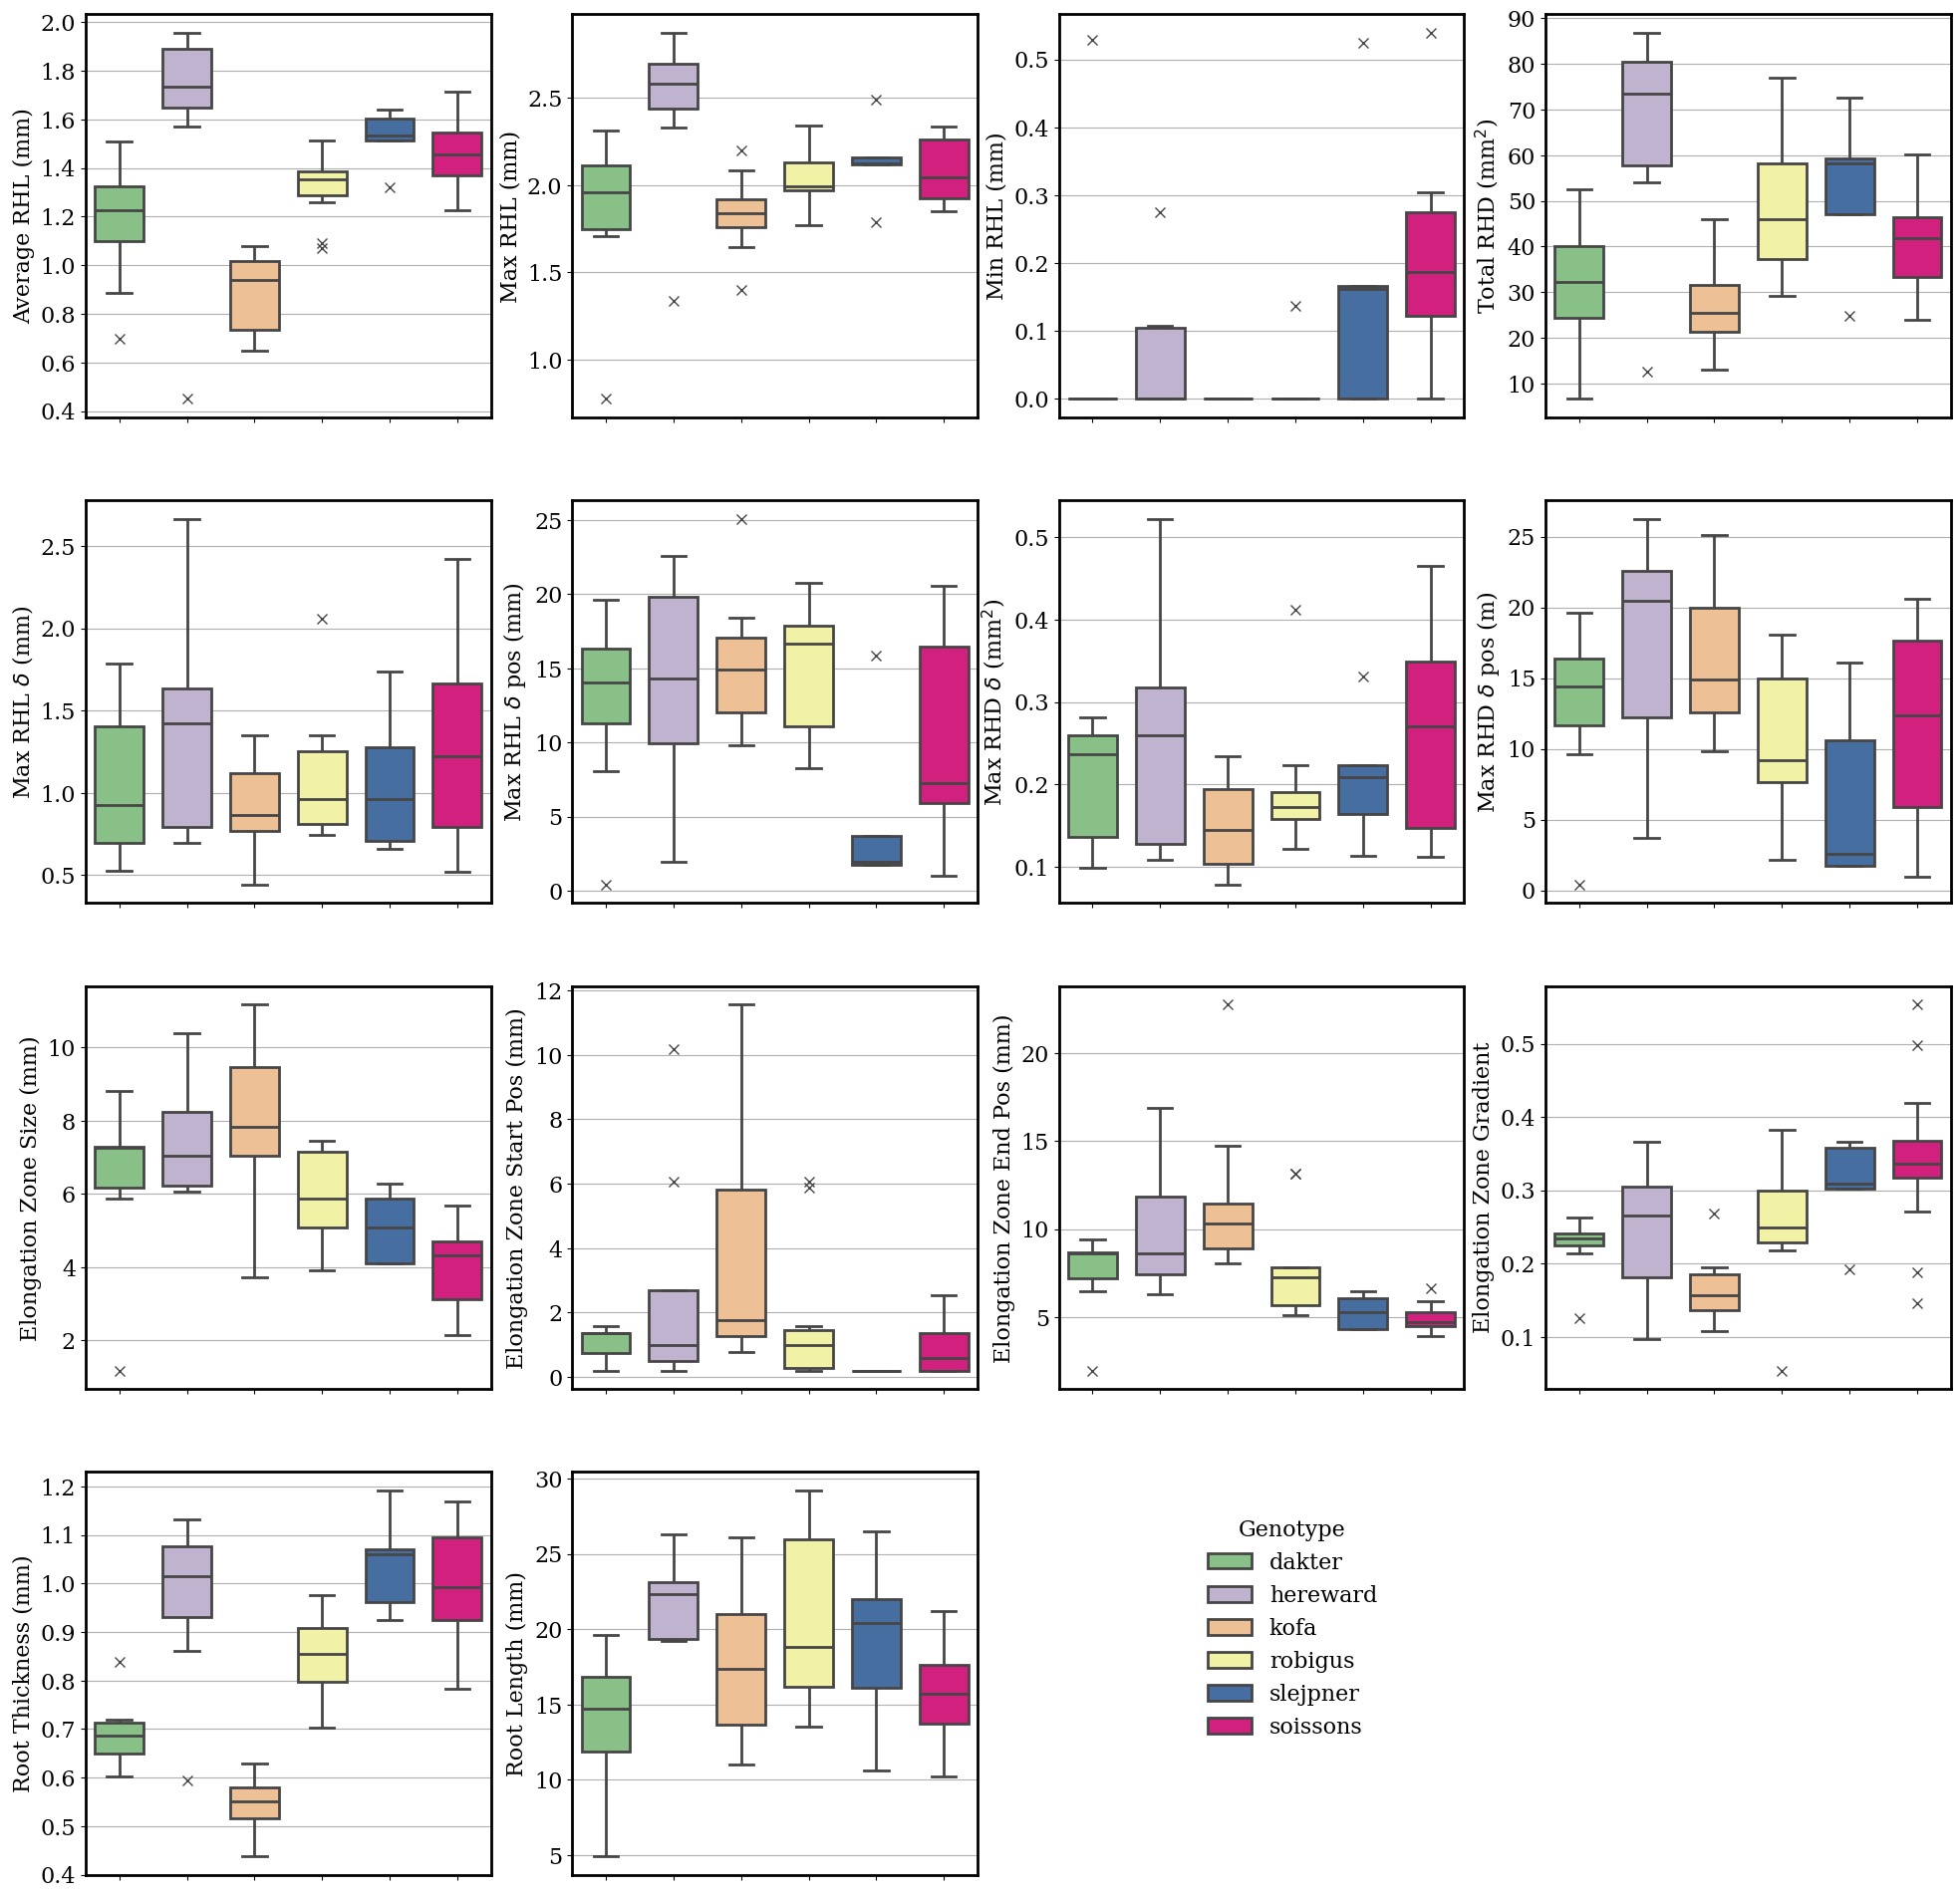

In [26]:
plt.rcParams['font.size'] = 16
x = sns.catplot(data=summary_df_melted,
            x='Run_ID',
            y='value',
            col='variable',
            hue='Run_ID',
            kind='box',
            palette='Accent',
            sharey=False,
            col_wrap=4,
            width=0.8,
            gap=0.1,
            linewidth=2,
            height=5,
            aspect=1,
            legend='brief',
            flierprops={'marker': 'x',
                        'markersize': 7}
            )            

x._legend.set_title('Genotype')

for ax, title in zip(x.axes.flat, titles):
    ax.set_ylabel(title)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.yaxis.grid(True)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(2)
sns.move_legend(x, 'lower right', bbox_to_anchor=(0.65, 0.1))
plt.subplots_adjust(wspace=0.2)

In [16]:
summary_df_melted

,Name,Run_ID,variable,value
0,dakter_0002_1,dakter,Avg RHL (mm),1.506961
1,dakter_0003_2,dakter,Avg RHL (mm),1.395110
2,dakter_0003_1,dakter,Avg RHL (mm),0.697647
3,dakter_0004,dakter,Avg RHL (mm),1.236641
4,dakter_0005_1,dakter,Avg RHL (mm),0.886607
...,...,...,...,...
765,soissons_0010,soissons,Root Length (mm),13.725490
766,soissons_0009,soissons,Root Length (mm),10.392157
767,soissons_0007,soissons,Root Length (mm),20.392157
768,soissons_0014,soissons,Root Length (mm),15.686275


In [18]:
genotype_summary = summary_df_melted.groupby(['Run_ID', 'variable'])[['value']].mean()

In [22]:
genotype_summary.to_csv('genotype_summary.xlsx')

In [22]:
summary_df = summary_df.drop(['Unnamed: 0'], axis=1)

In [27]:
summary_df.columns

Index(['Name', 'Run_ID', 'Avg RHL (mm)', 'Max RHL (mm)', 'Min RHL (mm)',
       'Total RHD (mm^{2})', 'Max RHL Segment Delta (mm)',
       'Max RHL Segment Pos (mm)', 'Max RHD Segment Delta (mm)',
       'Max RHD Segment Pos (mm)', 'Elongation Zone Distance (mm)',
       'Elongation Zone Start (mm)', 'Elongation Zone Stop (mm)',
       'Elongation Zone Gradient', 'Root Thickness (mm)', 'Root Length (mm)'],
      dtype='object')

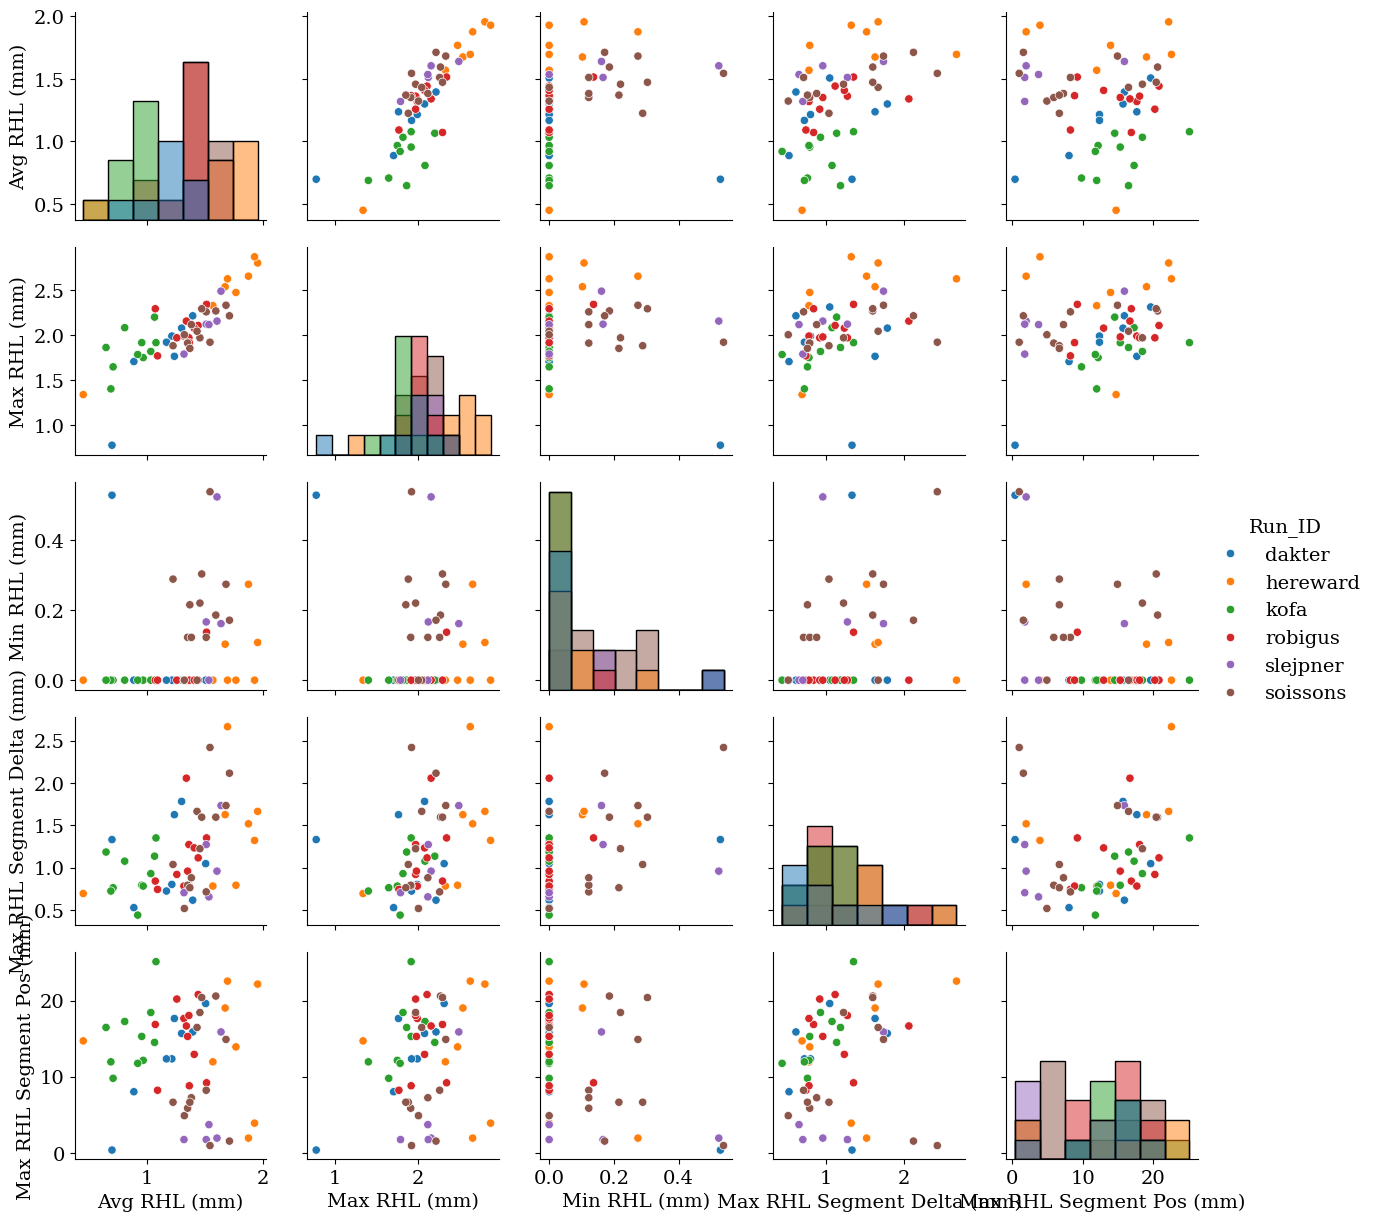

In [31]:
# g = sns.pairplot(
#     data=summary_df,
#     hue='Run_ID',
#     corner=True,
    
#     )

variables=['Avg RHL (mm)', 'Max RHL (mm)', 'Min RHL (mm)','Max RHL Segment Delta (mm)','Max RHL Segment Pos (mm)']

g = sns.PairGrid(summary_df, 
                 hue='Run_ID',
                 vars=variables)
g.map_diag(sns.histplot,)
g.map_offdiag(sns.scatterplot)
g.add_legend()




In [32]:
raw_df = pd.read_csv('CSV/wheat/master_raw.csv')

In [33]:
raw_df['Name']

0       dakter_0002_1
1       dakter_0002_1
2       dakter_0002_1
3       dakter_0002_1
4       dakter_0002_1
            ...      
5052    soissons_0013
5053    soissons_0013
5054    soissons_0013
5055    soissons_0013
5056    soissons_0013
Name: Name, Length: 5057, dtype: object

In [34]:
raw_df.drop(['Unnamed: 0'], axis=1)

,Name,Distance From Root Tip (mm),RHL 1,RHL 2,RHD 1,RHD 2
0,dakter_0002_1,19.607843,1.803922,0.754902,0.318916,0.037005
1,dakter_0002_1,19.411765,1.941176,1.303922,0.315167,0.180796
2,dakter_0002_1,19.215686,1.686275,1.558824,0.269416,0.285563
3,dakter_0002_1,19.019608,1.823529,1.813725,0.317762,0.327182
4,dakter_0002_1,18.823529,1.794118,1.735294,0.309304,0.322472
...,...,...,...,...,...,...
5052,soissons_0013,0.980392,0.382353,0.284314,0.064975,0.050557
5053,soissons_0013,0.784314,0.382353,0.333333,0.063725,0.055459
5054,soissons_0013,0.588235,0.205882,0.343137,0.031526,0.050461
5055,soissons_0013,0.392157,0.264706,0.274510,0.000000,0.046617


In [35]:
raw_df[['Genotype', 'Rep', '']] = raw_df['Name'].str.split('_', expand=True)

In [36]:
raw_df = raw_df.set_index('Genotype').drop(['Unnamed: 0'], axis=1)

In [37]:
raw_df = raw_df.drop(['Name'], axis=1)

In [38]:
raw_df

,Distance From Root Tip (mm),RHL 1,RHL 2,RHD 1,RHD 2,Rep,
Genotype,,,,,,,
dakter,19.607843,1.803922,0.754902,0.318916,0.037005,0002,1
dakter,19.411765,1.941176,1.303922,0.315167,0.180796,0002,1
dakter,19.215686,1.686275,1.558824,0.269416,0.285563,0002,1
dakter,19.019608,1.823529,1.813725,0.317762,0.327182,0002,1
dakter,18.823529,1.794118,1.735294,0.309304,0.322472,0002,1
...,...,...,...,...,...,...,...
soissons,0.980392,0.382353,0.284314,0.064975,0.050557,0013,None
soissons,0.784314,0.382353,0.333333,0.063725,0.055459,0013,None
soissons,0.588235,0.205882,0.343137,0.031526,0.050461,0013,None


In [39]:
raw_df['RHL_Avg'] = raw_df[['RHL 1', 'RHL 2']].mean(axis=1)

In [40]:
raw_df['RHD_Avg'] = raw_df[['RHD 1', 'RHD 2']].mean(axis=1)

In [41]:
raw_df

,Distance From Root Tip (mm),RHL 1,RHL 2,RHD 1,RHD 2,Rep,,RHL_Avg,RHD_Avg
Genotype,,,,,,,,,
dakter,19.607843,1.803922,0.754902,0.318916,0.037005,0002,1,1.279412,0.177960
dakter,19.411765,1.941176,1.303922,0.315167,0.180796,0002,1,1.622549,0.247982
dakter,19.215686,1.686275,1.558824,0.269416,0.285563,0002,1,1.622549,0.277489
dakter,19.019608,1.823529,1.813725,0.317762,0.327182,0002,1,1.818627,0.322472
dakter,18.823529,1.794118,1.735294,0.309304,0.322472,0002,1,1.764706,0.315888
...,...,...,...,...,...,...,...,...,...
soissons,0.980392,0.382353,0.284314,0.064975,0.050557,0013,None,0.333333,0.057766
soissons,0.784314,0.382353,0.333333,0.063725,0.055459,0013,None,0.357843,0.059592
soissons,0.588235,0.205882,0.343137,0.031526,0.050461,0013,None,0.274510,0.040994


In [71]:
test = raw_df.loc['hereward']

fig = px.line(test, x='Distance From Root Tip (mm)', y='RHD 1')

fig.show()

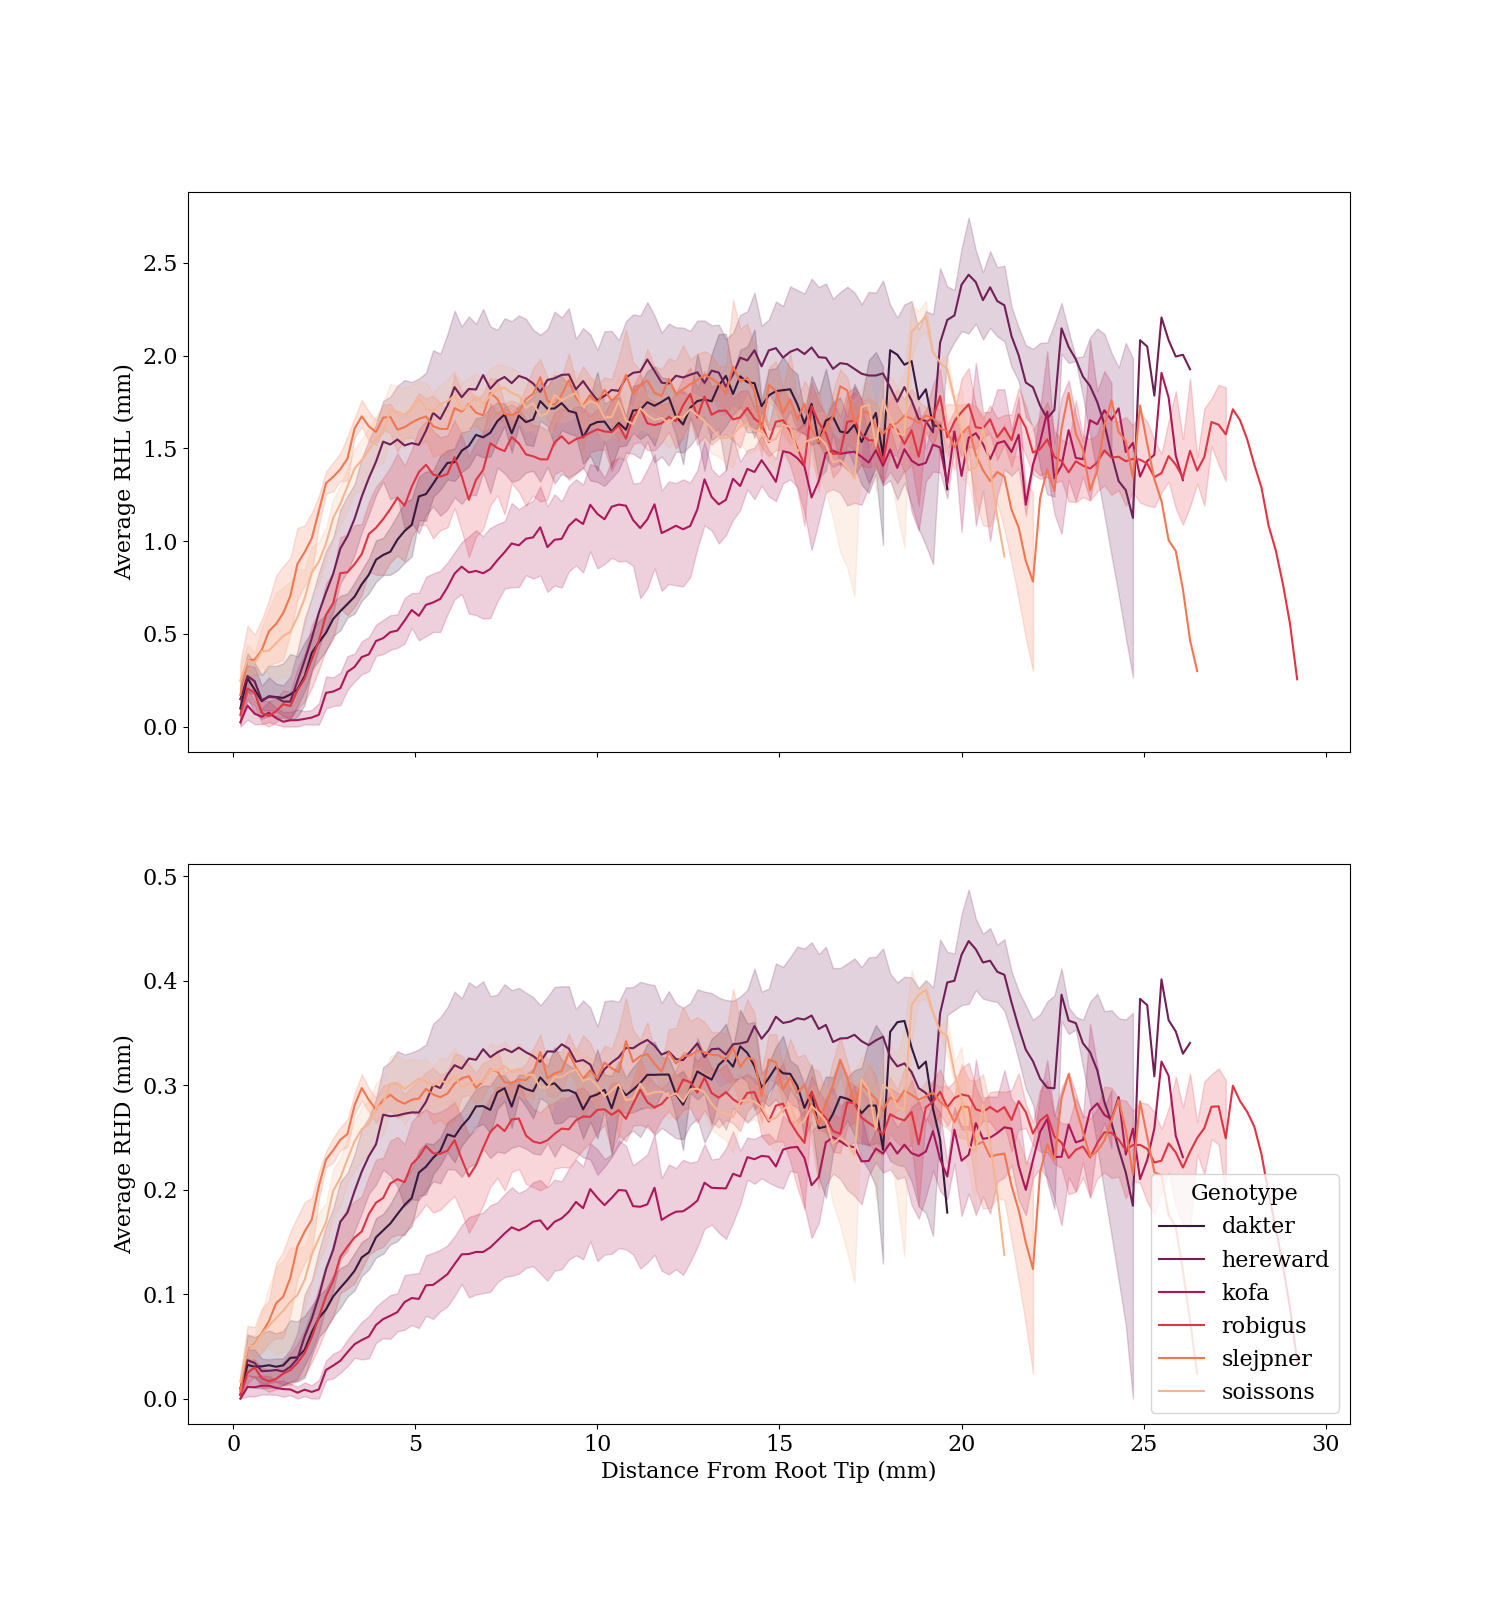

In [50]:
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.size'] = 16

# %matplotlib widget
fig, ax = plt.subplots(nrows=2, figsize=(15,16), sharex=True)
a = sns.lineplot(data=raw_df,
            x='Distance From Root Tip (mm)',
            y='RHL_Avg',
            hue='Genotype',
            palette='rocket',
            markers=True,
            ax=ax[0],
            legend=False
            )
a.set_ylabel('Average RHL (mm)')

b = sns.lineplot(data=raw_df,
            x='Distance From Root Tip (mm)',
            y='RHD_Avg',
            hue='Genotype',
            palette='rocket',
            markers=True,
            ax=ax[1]
            )
b.set_ylabel('Average RHD (mm)')

# plt.tight_layout()
plt.show()


<Axes: xlabel='Distance From Root Tip (mm)', ylabel='Average RHL (mm)'>